In [47]:
from DISPLAY import plot_changepoint_comparison, summarize_and_plot_total_cps, boxplot_cps
import os
import random

In [ ]:
# dataset = 'artificial_changepoints'
dataset = 'changepoints'

# DIRS_PARA_COMPARAR = {
#     'Agregação Mean': dataset + '/mean',
#     'Agregação Bayes': dataset + '/multiplicativa',
#     'Agregação Log (D_KL média)': dataset + '/logaritmica_KL',
#     'Agregação Log (H)': dataset + '/logaritmica_H',
#     'Pelt': dataset + '/pelt_rbf'
# }
DIRS_PARA_COMPARAR = {
    'P-RBF (AIC)': dataset + '/pelt_rbf_aic',
    'P-RBF (BIC)': dataset + '/pelt_rbf_bic',
    'P-RBF (pen=3)': dataset + '/pelt_rbf_p3',
    'P-ED (MBIC)': dataset + '/pelt_ed'
}

VARIABLES = ['throughput_download', 'throughput_upload', 'rtt_download', 'rtt_upload', 'packet_loss']
# VARIABLES = ['value']

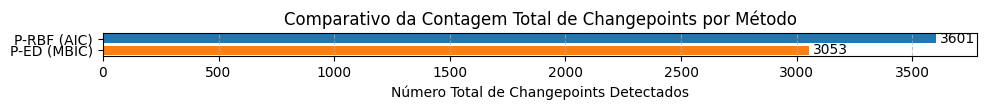

In [49]:
summarize_and_plot_total_cps(DIRS_PARA_COMPARAR)

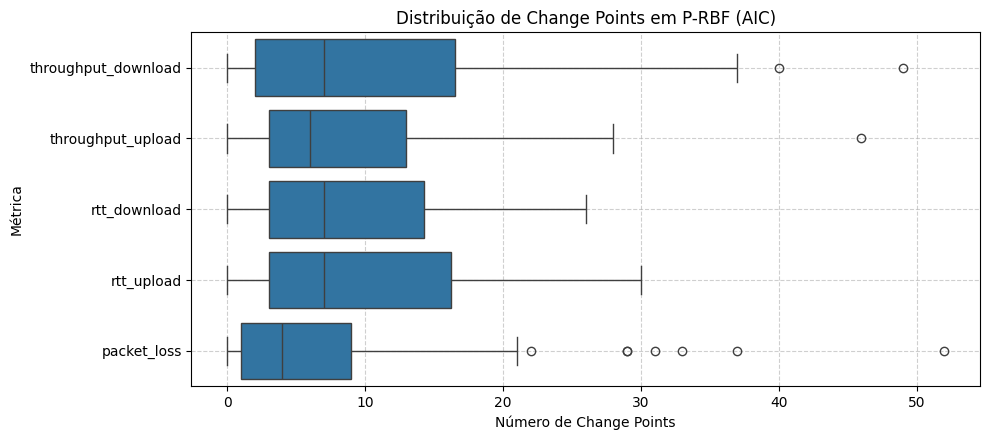

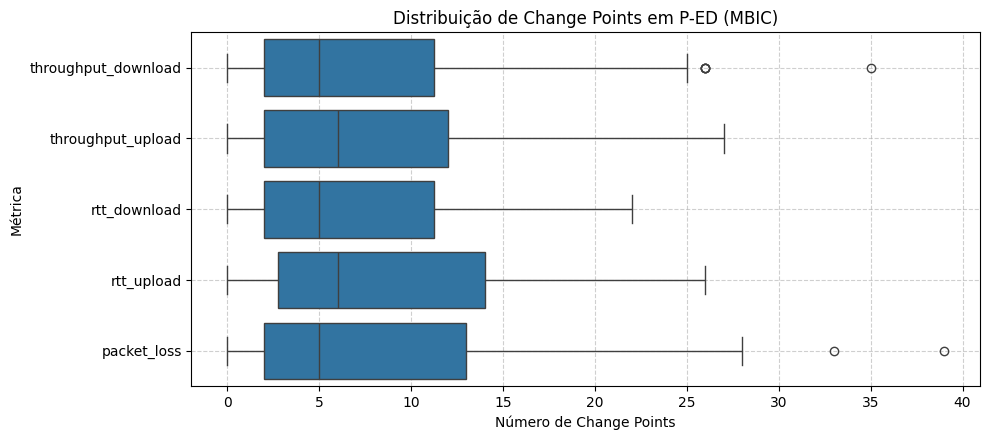

In [50]:
for name, dir_path in DIRS_PARA_COMPARAR.items():
    boxplot_cps(dir_path, VARIABLES, name)

In [51]:
# selecionar n arquivos aleatórios na pasta do métodos escolhido
def selecionar_arquivos_aleatorios(diretorio, n):
    arquivos = os.listdir(diretorio)
    arquivos_ramdom = random.sample(arquivos, n)
    pares_cliente_servidor = [(arquivo.split('_')[0], arquivo.split('_')[1].replace('.csv','')) for arquivo in arquivos_ramdom]
    return pares_cliente_servidor

def selecionar_todos_os_arquivos(diretorio):
    arquivos = os.listdir(diretorio)
    pares_cliente_servidor = [(arquivo.split('_')[0], arquivo.split('_')[1].replace('.csv','')) for arquivo in arquivos]
    return pares_cliente_servidor

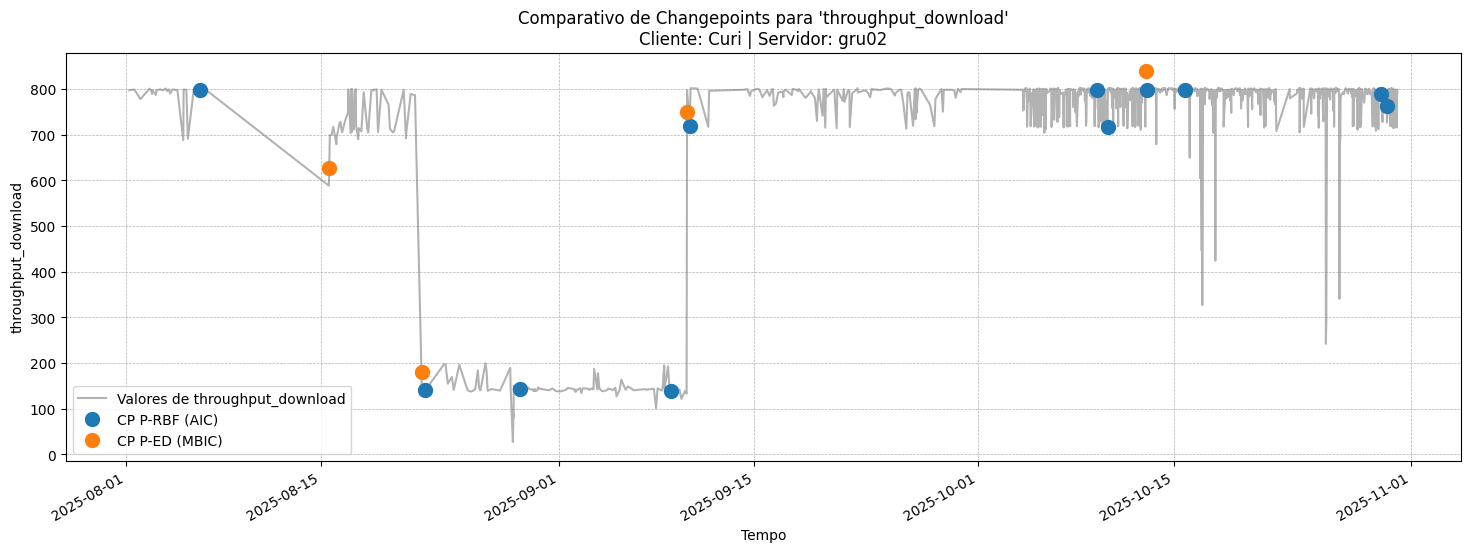

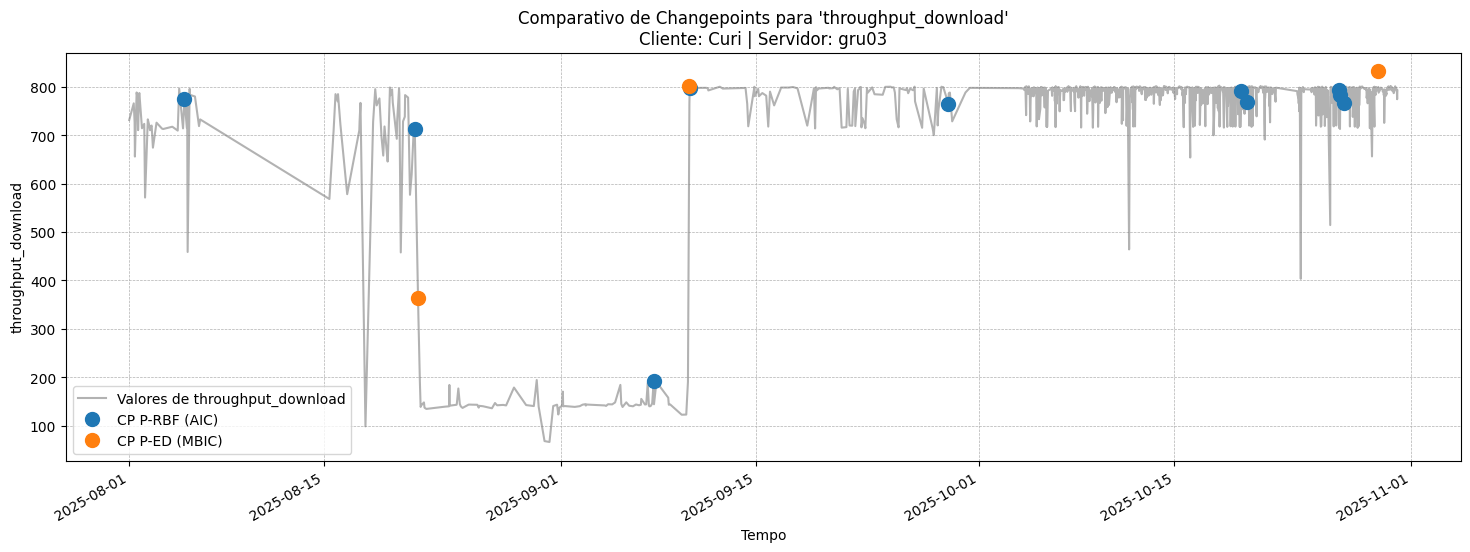

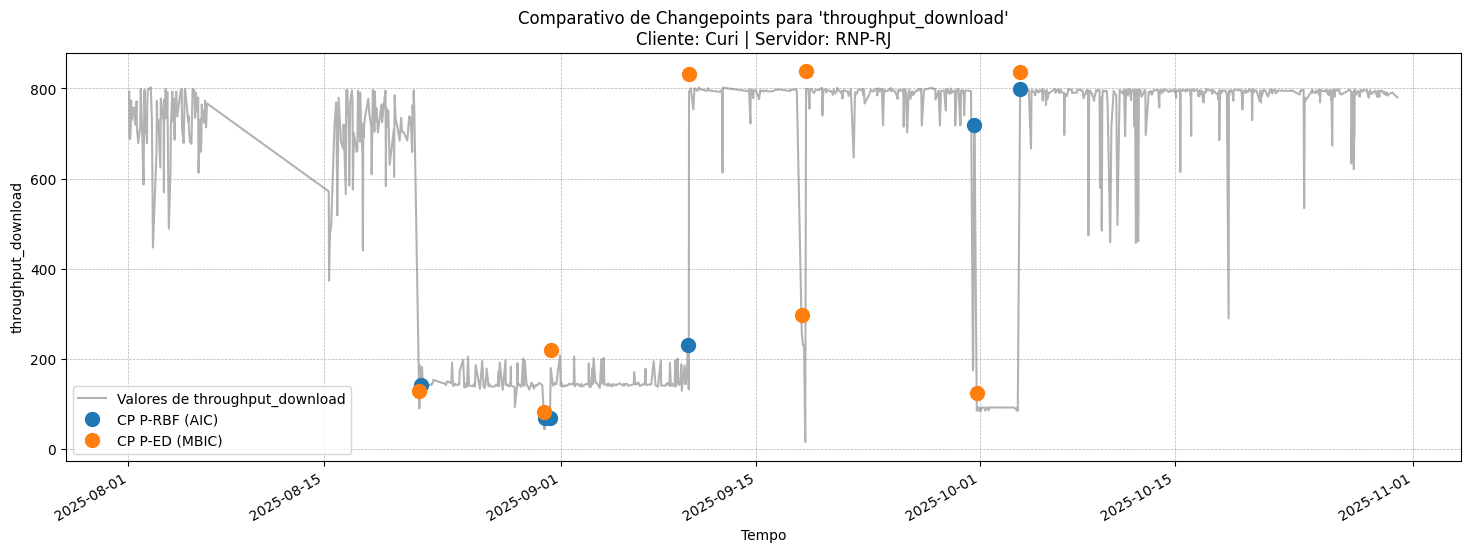

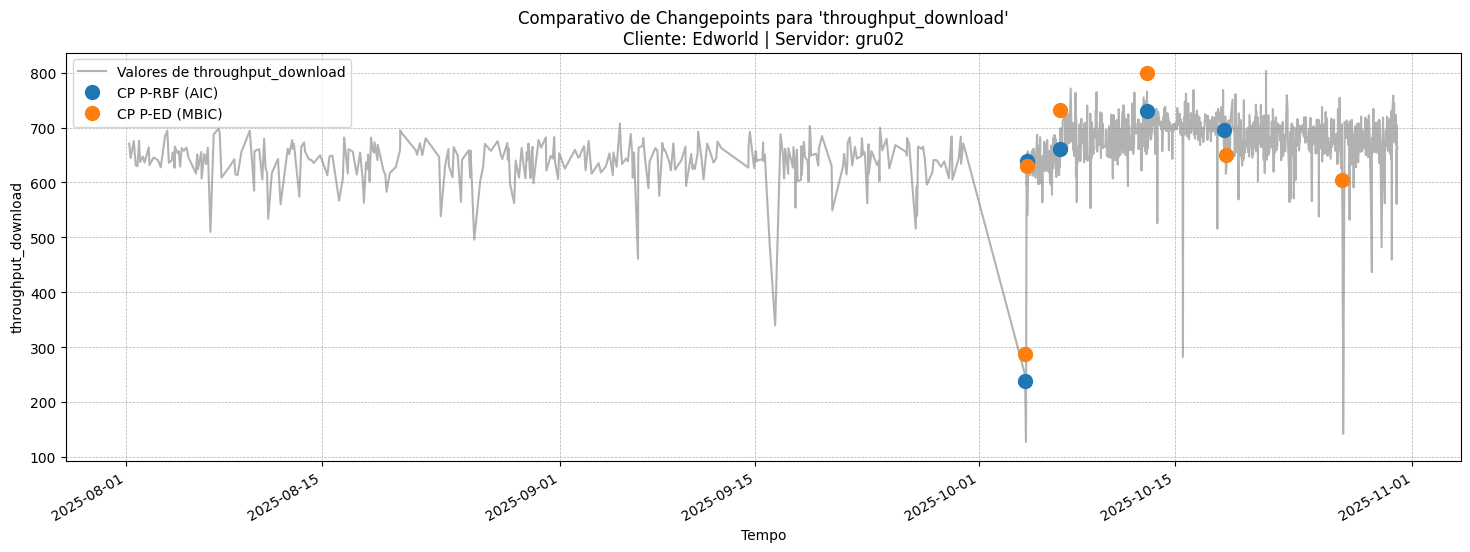

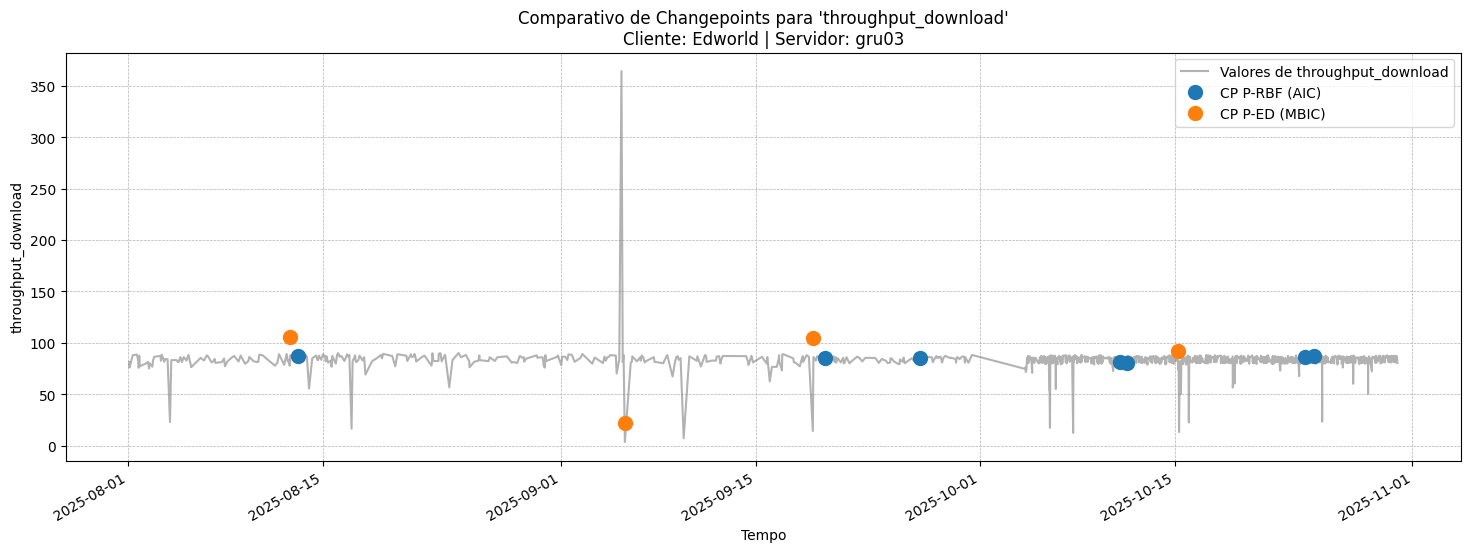

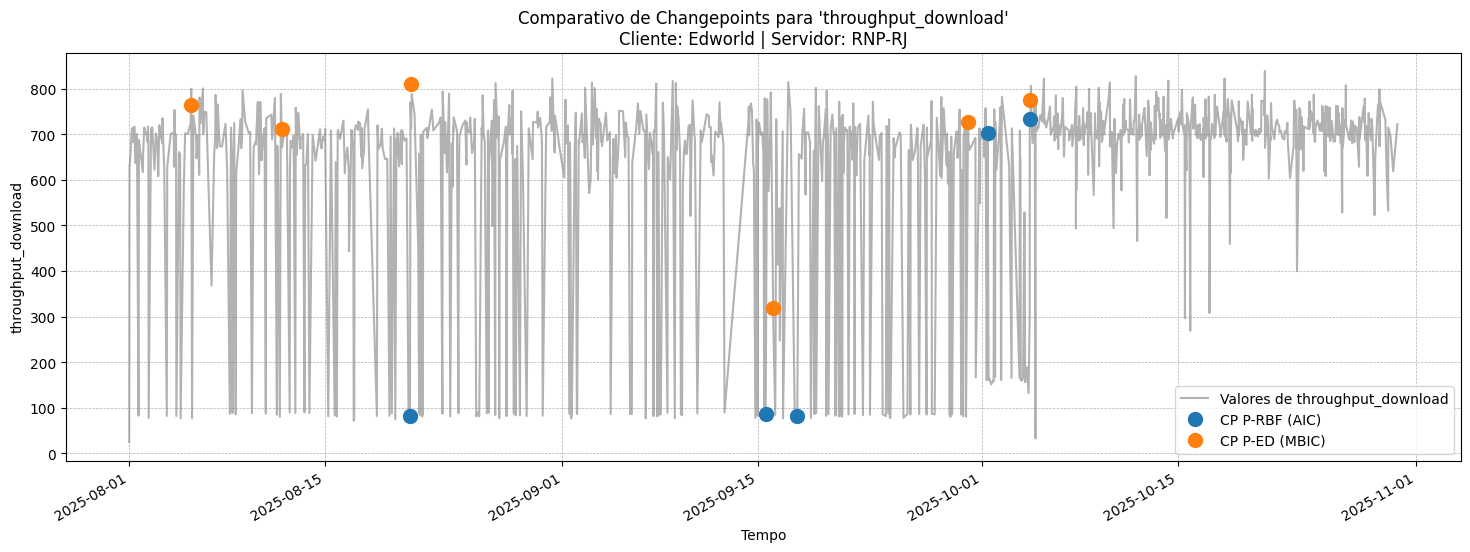

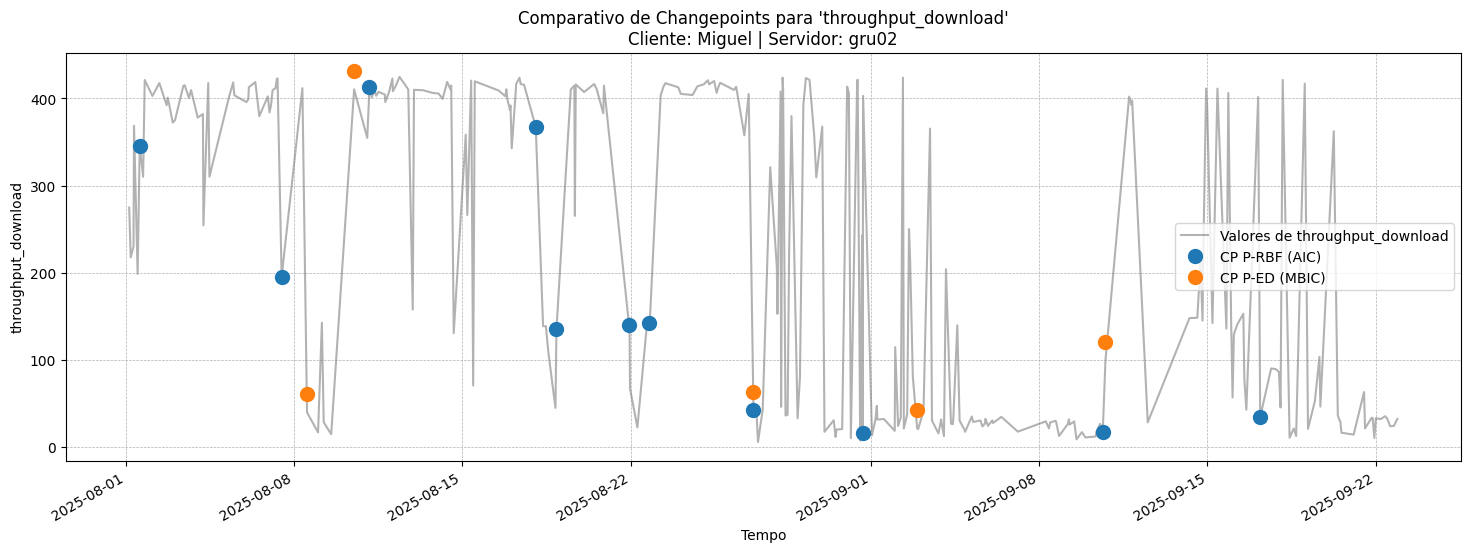

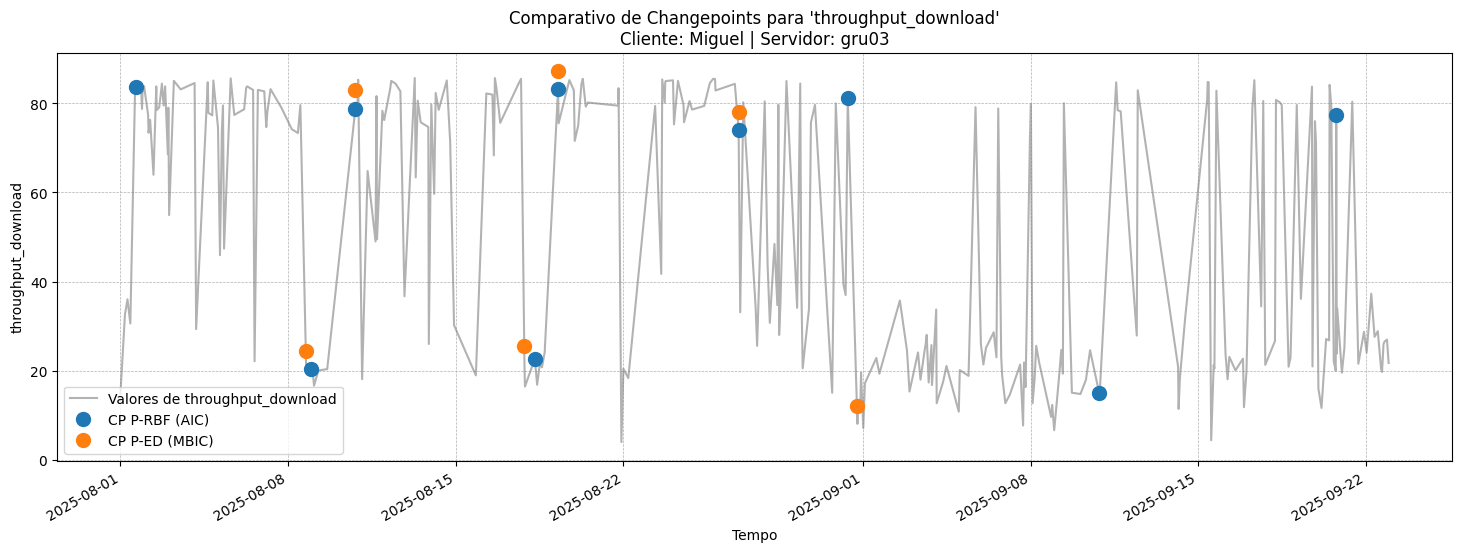

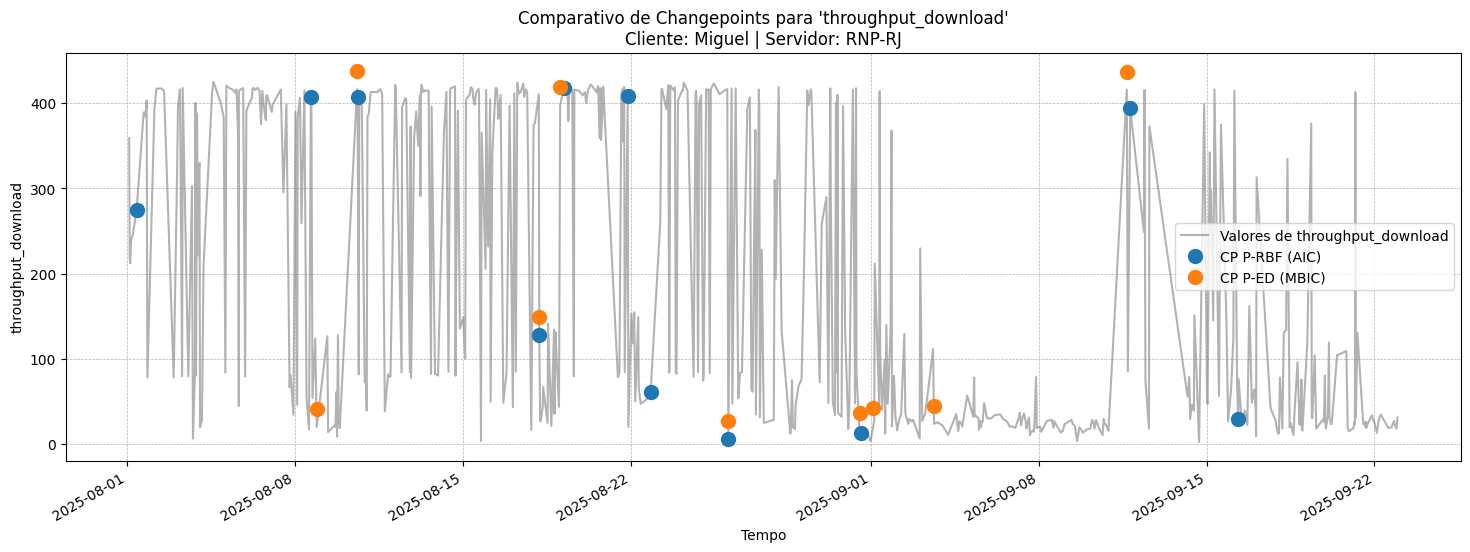

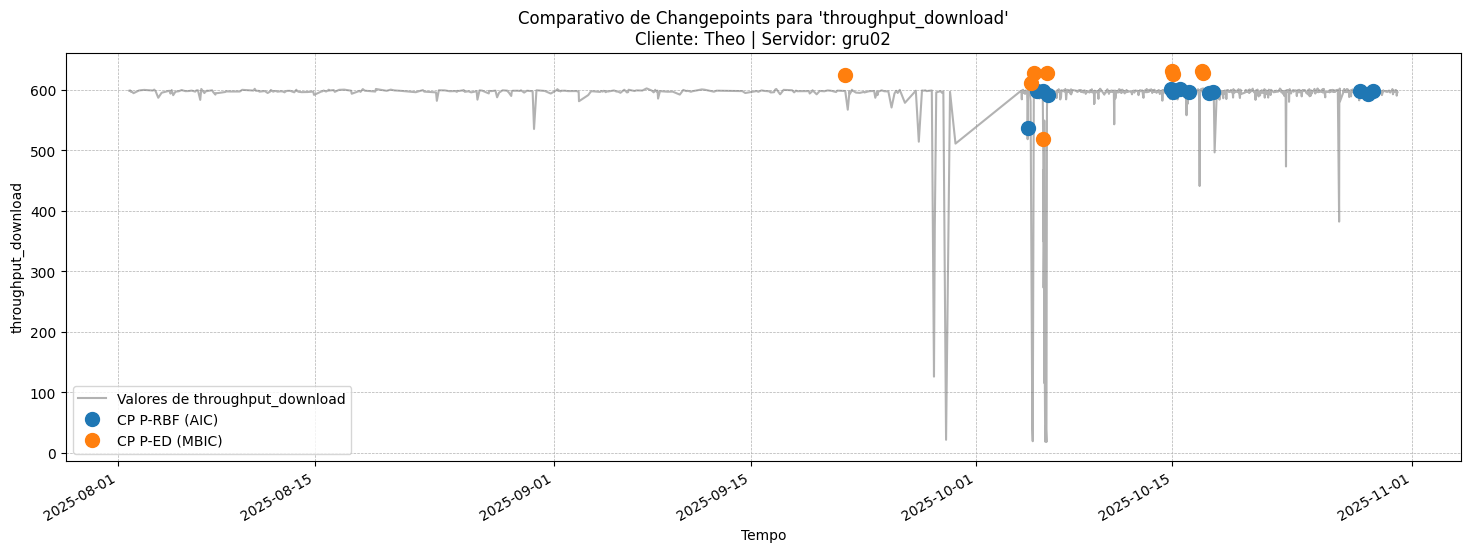

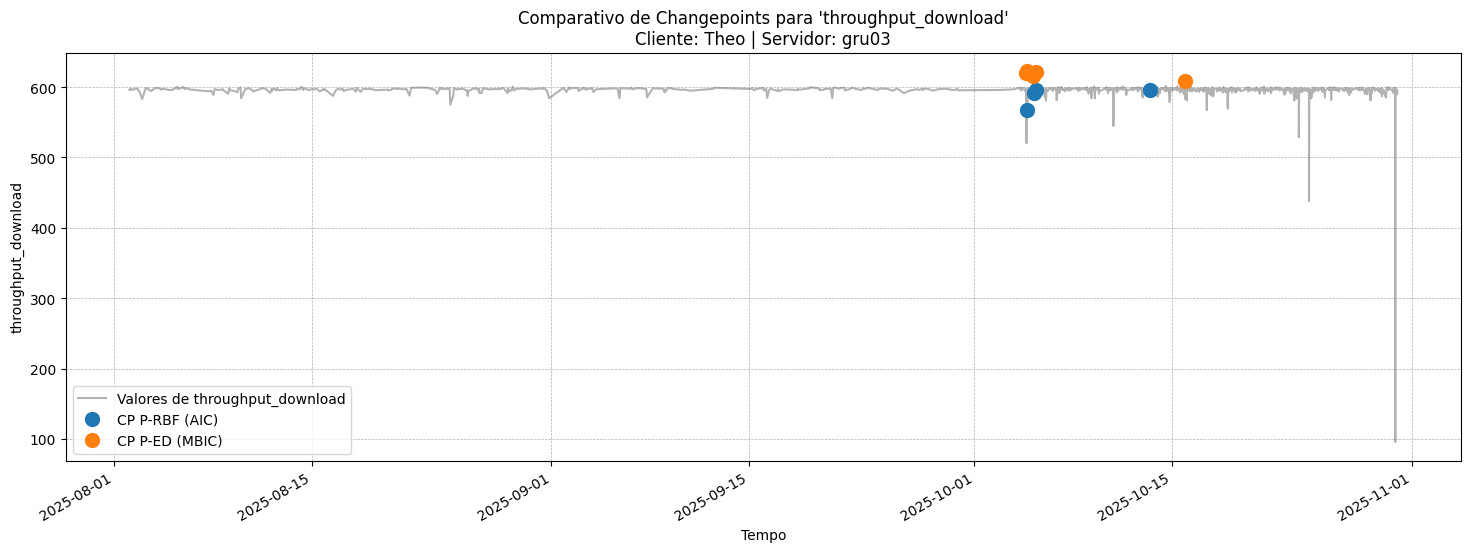

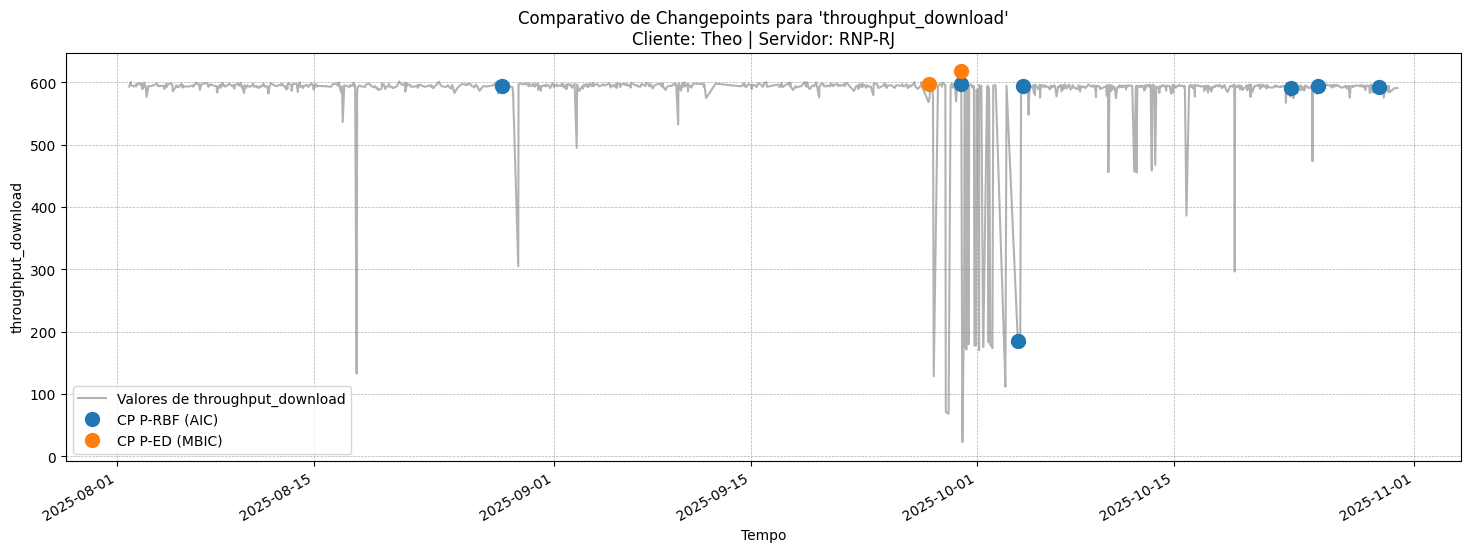

In [52]:
# DIRS_PARA_COMPARAR = {
#     'Agregação Log (H)': 'changepoints/logaritmica_H',
#     'Agregação Log (KL)': 'changepoints/logaritmica_KL',
#     'Pelt': 'changepoints/pelt'
# }

VARIABLES = ['throughput_download']

# pares = selecionar_arquivos_aleatorios('changepoints/pelt_rbf', 10)
# pares = selecionar_todos_os_arquivos('artificial_changepoints/pelt_rbf')
CLIENTS = ['Curi', 'Edworld', 'Miguel', 'Theo']
SERVERS = ['gru02', 'gru03', 'RNP-RJ']
pares = []
for client in CLIENTS:
    for server in SERVERS:
        pares.append((client, server))

# exclui as imagens antigas na pasta imgs_comparativo
# import os
# diretorio = 'imgs_comparativo'
# for arquivo in os.listdir(diretorio):
#     os.remove(os.path.join(diretorio, arquivo))

for client, server in pares:
    plot_changepoint_comparison(
        source_dirs=DIRS_PARA_COMPARAR,
        client=client,
        server=server,
        variables=VARIABLES,
        save_fig=False
    )

# renomeia as imagens salvas em imgs_comparativo para cps_comp_1, cps_comp_2, ...
# diretorio = 'imgs_comparativo'
# arquivos = os.listdir(diretorio)
# for i, arquivo in enumerate(arquivos):
#     extensao = arquivo.split('.')[-1]
#     novo_nome = f'cps_comp_{i+1}.{extensao}'
#     os.rename(os.path.join(diretorio, arquivo), os.path.join(diretorio, novo_nome))